In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/snigd/Downloads/Message_Data_Spam (1).csv", encoding='latin-1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [4]:
df.duplicated().sum()

403

In [5]:
df.rename(columns={'v1':'spam', 'v2':'Message'}, inplace=True)

In [6]:
df

,spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['spam'] = pd.get_dummies(df['spam'], columns='spam', drop_first=True)

In [8]:
df

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

spam       0
Message    0
dtype: int64

In [10]:
df[df.duplicated()].spam.value_counts()

0    309
1     94
Name: spam, dtype: int64

In [11]:
df['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe(include='all')

,spam,Message
count,5169.000000,5169
unique,NaN,5169
top,NaN,"Go until jurong point, crazy.. Available only ..."
freq,NaN,1
mean,0.126330,NaN
std,0.332253,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


In [14]:
df

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df['length'] = df['Message'].str.len()

In [16]:
df

,spam,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

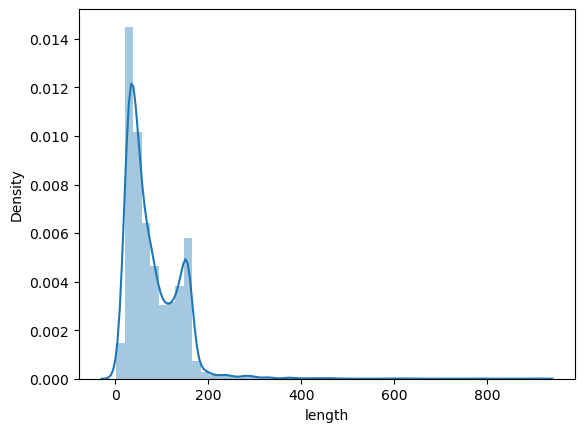

In [17]:
sns.distplot(df['length'], kde=True)

<AxesSubplot:xlabel='length', ylabel='Count'>

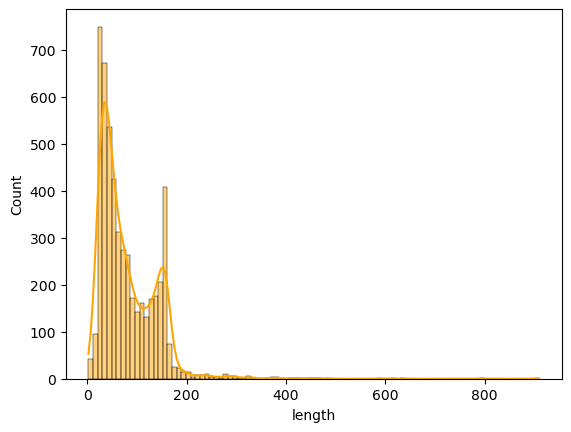

In [18]:
sns.histplot(df['length'], kde = True, color = 'orange')

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

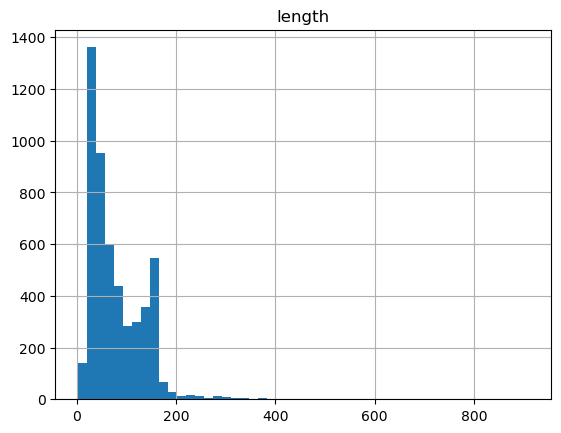

In [19]:
df.hist(column = 'length', bins=50)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

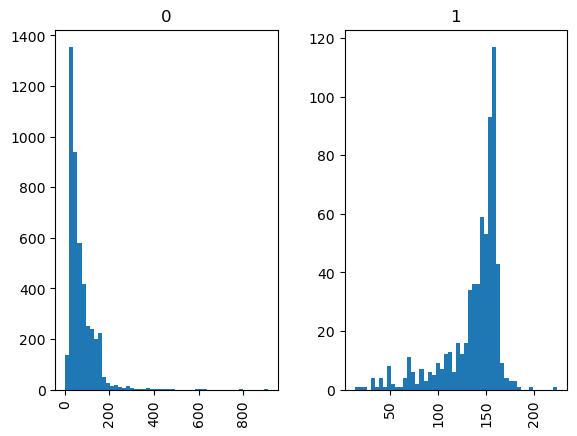

In [20]:
df.hist(column = 'length', bins=50, by='spam')

In [21]:
df

,spam,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
df['word_count'] = df['Message'].apply(lambda x : len(x.split()))

In [23]:
df

,spam,Message,length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [24]:
len("As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune".split())

26

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

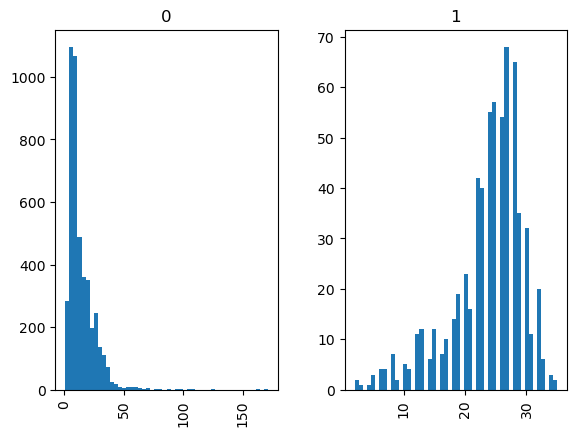

In [25]:
df.hist(column = 'word_count', bins=50, by='spam')

In [26]:
df[df['spam']==1]['word_count'].describe()

count    653.000000
mean      23.681470
std        5.967672
min        2.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: word_count, dtype: float64

In [27]:
df.iloc[25,1]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [28]:
df.iloc[15,1]

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [29]:
df.iloc[45,1]

'No calls..messages..missed calls'

In [30]:
df.iloc[92,1]

'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'

#### NORMALIZE

##### by removing the stop words

In [31]:
df['Message'] = df['Message'].str.lower()

In [32]:
'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'

'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'

In [33]:
import re

In [34]:
s = 'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'.lower()

In [35]:
s

'smile in pleasure smile in pain smile when trouble pours like rain smile when sum1 hurts u smile becoz someone still loves to see u smiling!!'

In [36]:
re.sub("[^a-z0-9\s]", "",s)

'smile in pleasure smile in pain smile when trouble pours like rain smile when sum1 hurts u smile becoz someone still loves to see u smiling'

In [37]:
df['Message'] = df['Message'].apply(lambda x : re.sub("[^a-z0-9\s]", "",x))

In [38]:
df['Message']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5169, dtype: object

In [39]:
spam = ('XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL').lower()

In [40]:
re.sub("[^a-z0-9\s]", "", spam)

'xxxmobilemovieclub to use your credit click the wap link in the next txt message or click here httpwap xxxmobilemovieclubcomnqjkgighjjgcbl'

In [41]:
import nltk

In [42]:
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
sw = stopwords.words('english')

In [45]:
s = 'this is the 2nd time we have tried 2 contact u'

In [46]:
s_new = ' '

In [47]:
for i in s.split():
    if i not in sw:
        s_new += i + ' '

In [48]:
s_new

' 2nd time tried 2 contact u '

In [49]:
' '.join([i for i in s.split() if i not in sw])

'2nd time tried 2 contact u'

In [50]:
df['Message'] = df['Message'].apply(lambda x : ' '.join([i for i in x.split() if i not in sw]))

In [51]:
df.reset_index(inplace=True, drop=True)

In [52]:
df

,spam,Message,length,word_count
0,0,go jurong point crazy available bugis n great ...,111,20
1,0,ok lar joking wif u oni,29,6
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,28
3,0,u dun say early hor u c already say,49,11
4,0,nah dont think goes usf lives around though,61,13
...,...,...,...,...
5164,1,2nd time tried 2 contact u u 750 pound prize 2...,161,30
5165,0,b going esplanade fr home,37,8
5166,0,pity mood soany suggestions,57,10
5167,0,guy bitching acted like id interested buying s...,125,26


In [53]:
df.iloc[5164,1]

'2nd time tried 2 contact u u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute btnationalrate'

In [54]:
df

,spam,Message,length,word_count
0,0,go jurong point crazy available bugis n great ...,111,20
1,0,ok lar joking wif u oni,29,6
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,28
3,0,u dun say early hor u c already say,49,11
4,0,nah dont think goes usf lives around though,61,13
...,...,...,...,...
5164,1,2nd time tried 2 contact u u 750 pound prize 2...,161,30
5165,0,b going esplanade fr home,37,8
5166,0,pity mood soany suggestions,57,10
5167,0,guy bitching acted like id interested buying s...,125,26


In [55]:
df.iloc[555]

spam                                                          0
Message       fuck babe miss already know cant let send mone...
length                                                      146
word_count                                                   34
Name: 555, dtype: object

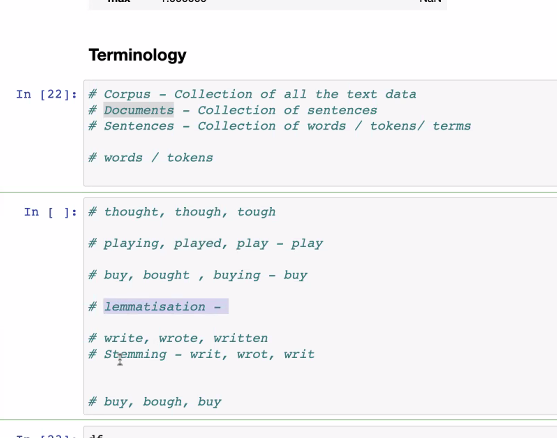

#### frequency of each word

- least frequently used word to be measured
- detect the most repeated word

#### Term Frequency

- sale, lottery, free : eg

- I want to go home and sleep
- I want to stay awake because the lecture is intersting

###### 1) Splitting

In [56]:
Master_word_list = ' '.join(df['Message']).split()

In [57]:
unique_word_count = {}

In [58]:
for i in set(Master_word_list):
    unique_word_count[i] = Master_word_list.count(i)

In [59]:
unique_word_count

{'poly': 15,
 'claypot': 1,
 'fakemy': 1,
 'laundry': 2,
 'hogli': 1,
 'stoptxt': 1,
 'kkwhy': 1,
 'kafter': 1,
 '10am7pm': 4,
 '146tf150p': 1,
 'urgentlyits': 1,
 'digits': 1,
 'latr': 2,
 'supply': 2,
 'com': 1,
 'denying': 1,
 'randomly': 3,
 'hail': 1,
 'print': 2,
 'e14': 1,
 'kinda': 9,
 'year': 45,
 '131004': 1,
 'im': 456,
 'announcement': 5,
 'install': 1,
 'eg23g': 1,
 'snap': 1,
 'heap': 1,
 'wings': 1,
 'burns': 2,
 'kim': 1,
 'dudette': 1,
 'gent': 2,
 '10ppm': 2,
 'forum': 2,
 'nuther': 2,
 '08712317606': 2,
 'pobox45w2tg150p': 2,
 'dramatic': 1,
 'maneesha': 1,
 'eckankar': 1,
 'yogasana': 5,
 'minuts': 2,
 'elaine': 2,
 'brolly': 1,
 'korche': 1,
 'dvd': 6,
 'tomo': 17,
 'boatin': 1,
 'httpimg': 1,
 'resubbing': 1,
 '84': 1,
 'aha': 8,
 'glad': 10,
 'stool': 1,
 '1230': 1,
 'march': 12,
 '45': 1,
 'worms': 1,
 'playi': 1,
 'receiving': 4,
 'beggar': 1,
 'ucall': 1,
 'appropriate': 1,
 '46': 1,
 'xx': 11,
 'clover': 1,
 'picking': 10,
 'direct': 12,
 'ages': 4,
 'lateso'

In [60]:
term_freq = pd.Series(unique_word_count).sort_values(ascending=False)

In [61]:
term_freq

u           1001
call         487
im           456
2            443
get          364
            ... 
sagamu         1
retired        1
meetins        1
shortage       1
jeri           1
Length: 9346, dtype: int64

In [62]:
least_freq_word_used = term_freq[term_freq<=1].index

In [63]:
term_freq[term_freq<=1].index

Index(['yesbut', 'ifwhenhow', 'exposes', 'px3748', 'herepls', 'nose', '1cup',
       'intrepid', 'asda', '07008009200',
       ...
       'fwiw', 'growrandom', 'nowreply', 'jot', '09066362206', 'sagamu',
       'retired', 'meetins', 'shortage', 'jeri'],
      dtype='object', length=5634)

In [64]:
df

,spam,Message,length,word_count
0,0,go jurong point crazy available bugis n great ...,111,20
1,0,ok lar joking wif u oni,29,6
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,28
3,0,u dun say early hor u c already say,49,11
4,0,nah dont think goes usf lives around though,61,13
...,...,...,...,...
5164,1,2nd time tried 2 contact u u 750 pound prize 2...,161,30
5165,0,b going esplanade fr home,37,8
5166,0,pity mood soany suggestions,57,10
5167,0,guy bitching acted like id interested buying s...,125,26


In [65]:
df['Message'] = df['Message'].apply(lambda x :' '.join(i for i in x.split() if i not in least_freq_word_used))

In [66]:
df['Message']

0       go point crazy available bugis n great world l...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5164    2nd time tried 2 contact u u 750 pound prize 2...
5165                            b going esplanade fr home
5166                                                 mood
5167    guy acted like id interested buying something ...
5168                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [67]:
term_freq.head(50)

u         1001
call       487
im         456
2          443
get        364
ur         316
dont       269
go         269
4          257
ltgt       254
ok         251
free       243
know       239
got        231
like       231
good       217
ill        210
come       210
time       199
want       187
day        182
love       178
text       170
send       165
going      165
one        163
need       162
lor        157
home       153
see        149
back       146
still      146
txt        139
r          138
stop       137
well       130
think      130
today      129
reply      128
tell       127
n          125
hi         125
new        125
da         124
sorry      122
take       121
mobile     118
please     118
phone      112
hey        111
dtype: int64

In [68]:
most_freq_used_words = term_freq.head(9).index

In [69]:
df['Message'] = df['Message'].apply(lambda x :' '.join(i for i in x.split() if i not in most_freq_used_words))

In [70]:
df['Message']

0       point crazy available bugis n great world la e...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts 21s...
3                         dun say early hor c already say
4                  nah think goes usf lives around though
                              ...                        
5164    2nd time tried contact 750 pound prize claim e...
5165                            b going esplanade fr home
5166                                                 mood
5167    guy acted like id interested buying something ...
5168                                       rofl true name
Name: Message, Length: 5169, dtype: object

### Steeming

In [71]:
from nltk.stem import PorterStemmer

In [72]:
st = PorterStemmer()

In [73]:
st.stem('buying')

'buy'

In [74]:
st.stem('dancing')

'danc'

In [75]:
[st.stem(i) for i in ['Alumni', 'Alumnus', 'Alumnae']]

['alumni', 'alumnu', 'alumna']

In [76]:
df['Message'].apply(lambda x : ' '.join(st.stem(i) for i in x.split()))

0       point crazi avail bugi n great world la e buff...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkt 21st...
3                         dun say earli hor c alreadi say
4                    nah think goe usf live around though
                              ...                        
5164    2nd time tri contact 750 pound prize claim eas...
5165                                b go esplanad fr home
5166                                                 mood
5167    guy act like id interest buy someth els next w...
5168                                       rofl true name
Name: Message, Length: 5169, dtype: object

### Lemmatizer

In [77]:
from nltk.stem import WordNetLemmatizer

In [78]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [79]:
lem = WordNetLemmatizer()

In [80]:
[lem.lemmatize(i, pos='v') for i in ['write', 'Bought', 'writing', 'played']]

['write', 'Bought', 'write', 'play']

In [81]:
[lem.lemmatize(i) for i in ['Alumni', 'Alumnus', 'Alumnae']]

['Alumni', 'Alumnus', 'Alumnae']

In [82]:
[lem.lemmatize(i, pos='r') for i in ['nicely', 'fastly', 'hugely']]

['nicely', 'fastly', 'hugely']

In [83]:
df['Message'] = df['Message'].apply(lambda x : ' '.join(lem.lemmatize(i, pos='v') for i in x.split()))

In [84]:
df['Message']

0       point crazy available bugis n great world la e...
1                                     ok lar joke wif oni
2       free entry wkly comp win fa cup final tkts 21s...
3                         dun say early hor c already say
4                     nah think go usf live around though
                              ...                        
5164    2nd time try contact 750 pound prize claim eas...
5165                               b go esplanade fr home
5166                                                 mood
5167    guy act like id interest buy something else ne...
5168                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [85]:
df

,spam,Message,length,word_count
0,0,point crazy available bugis n great world la e...,111,20
1,0,ok lar joke wif oni,29,6
2,1,free entry wkly comp win fa cup final tkts 21s...,155,28
3,0,dun say early hor c already say,49,11
4,0,nah think go usf live around though,61,13
...,...,...,...,...
5164,1,2nd time try contact 750 pound prize claim eas...,161,30
5165,0,b go esplanade fr home,37,8
5166,0,mood,57,10
5167,0,guy act like id interest buy something else ne...,125,26


### Count Vectorisation - 



In [86]:
#'I want to sleep'

# I. want. to. sleep.
# 1    1       1   1

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
cv = CountVectorizer()

In [89]:
df

,spam,Message,length,word_count
0,0,point crazy available bugis n great world la e...,111,20
1,0,ok lar joke wif oni,29,6
2,1,free entry wkly comp win fa cup final tkts 21s...,155,28
3,0,dun say early hor c already say,49,11
4,0,nah think go usf live around though,61,13
...,...,...,...,...
5164,1,2nd time try contact 750 pound prize claim eas...,161,30
5165,0,b go esplanade fr home,37,8
5166,0,mood,57,10
5167,0,guy act like id interest buy something else ne...,125,26


In [90]:
y = df['spam']

In [91]:
x = df['Message']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [94]:
x_train_cv = cv.fit_transform(x_train)

In [95]:
x_test_cv = cv.transform(x_test)

In [96]:
x_train_cv

<3618x3054 sparse matrix of type '<class 'numpy.int64'>'
	with 24719 stored elements in Compressed Sparse Row format>

Classification Models - Logistic, decision Tree, Random forest, Naive Bayes, 

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logR = LogisticRegression()

In [99]:
logR.fit(x_train_cv, y_train)

LogisticRegression()

In [100]:
logR.predict(x_test_cv)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [101]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score 

In [102]:
print(accuracy_score(y_test, logR.predict(x_test_cv)))

0.9677627337201805


In [103]:
print(roc_auc_score(y_test, logR.predict(x_test_cv)))

0.8789394249462805


In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
df_cv = pd.DataFrame(confusion_matrix(y_test, logR.predict(x_test_cv)), columns = ['predict_0', 'predict_1'], index = ['actual_0','actual_1'])

<AxesSubplot:>

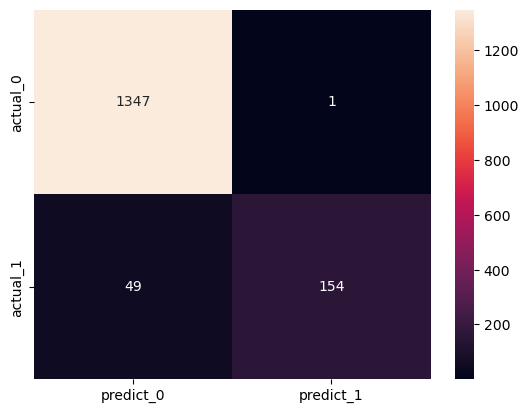

In [106]:
sns.heatmap(df_cv, annot = True, fmt='g')